In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('by_tag_year.csv')

df.head(10)

,year,tag,number,year_total
0,2008,.htaccess,54,58390
1,2008,.net,5910,58390
2,2008,.net-2.0,289,58390
3,2008,.net-3.5,319,58390
4,2008,.net-4.0,6,58390
5,2008,.net-assembly,3,58390
6,2008,.net-core,1,58390
7,2008,2d,42,58390
8,2008,32-bit,19,58390
9,2008,32bit-64bit,4,58390


In [11]:
fraction = df['number'] / df['year_total']
df['fraction'] = fraction
df

,year,tag,number,year_total,fraction
0,2008,.htaccess,54,58390,0.000925
1,2008,.net,5910,58390,0.101216
2,2008,.net-2.0,289,58390,0.004949
3,2008,.net-3.5,319,58390,0.005463
4,2008,.net-4.0,6,58390,0.000103
...,...,...,...,...,...
40513,2018,zlib,89,1085170,0.000082
40514,2018,zoom,196,1085170,0.000181
40515,2018,zsh,175,1085170,0.000161
40516,2018,zurb-foundation,182,1085170,0.000168


In [24]:
mean_fraction = df.groupby('tag')['fraction'].mean()
t10poplang = mean_fraction.nlargest(10)
t10poplang

tag
javascript    0.089566
c#            0.087213
java          0.084873
php           0.070335
android       0.056534
python        0.055322
jquery        0.052026
html          0.041634
c++           0.038696
mysql         0.030767
Name: fraction, dtype: float64

In [40]:
percent_values = [f"{round(100 * a, 2)}%" for a in t10poplang.values]
percent_values

['8.96%',
 '8.72%',
 '8.49%',
 '7.03%',
 '5.65%',
 '5.53%',
 '5.2%',
 '4.16%',
 '3.87%',
 '3.08%']

## Most yearly-searched programming-related tags from 2008 to 2018 on average, 

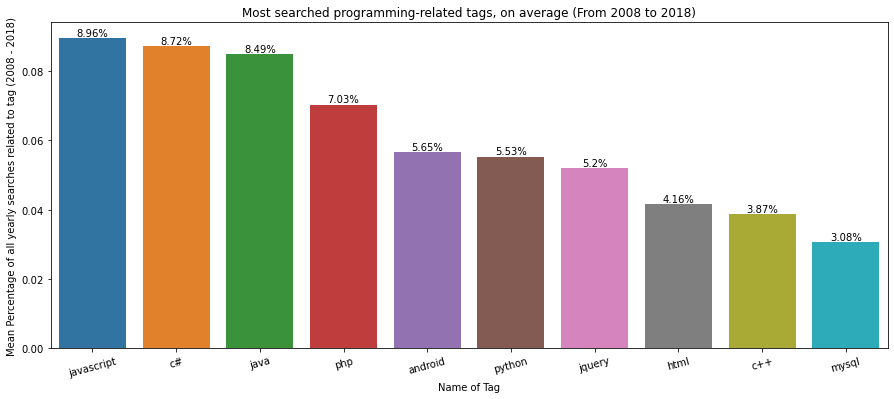

In [39]:
plt.figure(figsize = (15, 6))

ax = sns.barplot(x = t10poplang.index, y = t10poplang)
ax.bar_label(ax.containers[0], labels = percent_values)

plt.title('Most searched programming-related tags, on average (From 2008 to 2018)')
plt.ylabel('Mean Percentage of all yearly searches related to tag (2008 - 2018)')
plt.xlabel('Name of Tag')

plt.xticks(rotation = 15)

plt.show()

## Visualising the trend of one programming language over time

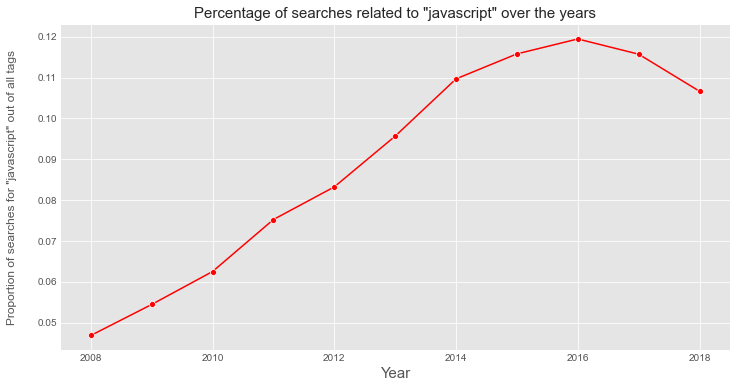

In [60]:
name = 'javascript'

lang_df = df.loc[df['tag'] == name]

plt.figure(figsize = (12, 6))
plt.style.use('ggplot')

sns.lineplot(data = lang_df, x = 'year', y = 'fraction',color = 'red', marker = 'o', markerfacecolor = 'red')

plt.title('Percentage of searches related to "{}" over the years'.format(name), fontsize = 15)
plt.ylabel('Proportion of searches for "{}" out of all tags'.format(name), fontsize = 12, labelpad = 20)
plt.xlabel('Year', fontsize = 15)

plt.show()

## Historical Trend of Top-Searched Programming Language Tags in 2018 over the years

In [68]:
df_2018 = df.loc[df['year'] == 2018]
tpl_2018 = df_2018.nlargest(10, 'fraction')
tpl_2018

,year,tag,number,year_total,fraction
38309,2018,javascript,115726,1085170,0.106643
39282,2018,python,107348,1085170,0.098923
38291,2018,java,83841,1085170,0.077261
36593,2018,android,65495,1085170,0.060355
39107,2018,php,61257,1085170,0.056449
37002,2018,c#,59343,1085170,0.054685
38085,2018,html,46063,1085170,0.042448
38372,2018,jquery,33725,1085170,0.031078
37295,2018,css,31021,1085170,0.028586
36683,2018,angular,30723,1085170,0.028312


In [71]:
df_topl10 = df[df['tag'].isin(tpl_2018['tag'].values)]
df_topl10

,year,tag,number,year_total,fraction
76,2008,android,38,58390,0.000651
255,2008,c#,7473,58390,0.127984
461,2008,css,933,58390,0.015979
986,2008,html,1399,58390,0.023960
1131,2008,java,4315,58390,0.073900
...,...,...,...,...,...
38291,2018,java,83841,1085170,0.077261
38309,2018,javascript,115726,1085170,0.106643
38372,2018,jquery,33725,1085170,0.031078
39107,2018,php,61257,1085170,0.056449


In [94]:
tpl_2018['tag'].sort_values().values

array(['android', 'angular', 'c#', 'css', 'html', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

### Rearranging list for ordered plt.legend()

In [82]:
entity_sort = list(tpl_2018['tag'].sort_values().values)
entity_sort 

['android',
 'angular',
 'c#',
 'css',
 'html',
 'java',
 'javascript',
 'jquery',
 'php',
 'python']

In [83]:
new_sort = list(tpl_2018['tag'])
new_sort

['javascript',
 'python',
 'java',
 'android',
 'php',
 'c#',
 'html',
 'jquery',
 'css',
 'angular']

In [84]:
ord_list = []

for item in new_sort:
    if item in entity_sort:
        ord_list.append(entity_sort.index(item))
    
ord_list

[6, 9, 5, 0, 8, 2, 4, 7, 3, 1]

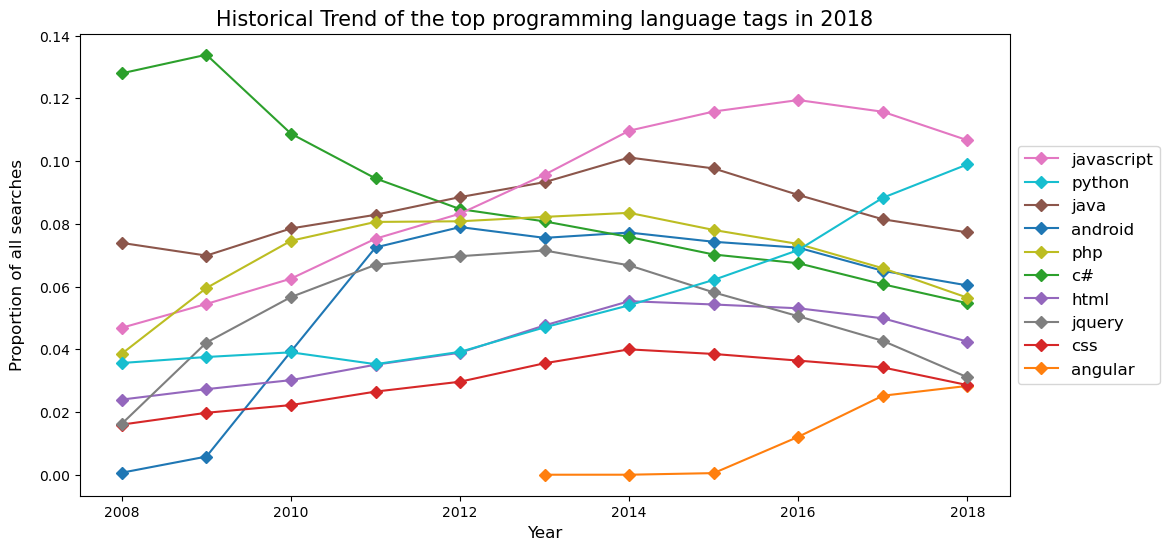

In [93]:
fig, ax = plt.subplots(figsize = (12, 6))
plt.style.use('default')

for pl, group in df_topl10.groupby('tag'):
    group.plot(x = 'year', y = 'fraction', ax = ax, label = pl, marker = 'D')

plt.title('Historical Trend of the top programming language tags in 2018', fontsize = 15)
plt.ylabel('Proportion of all searches', labelpad = 10, fontsize = 12)
plt.xlabel('Year', fontsize = 12)

handles, labels = plt.gca().get_legend_handles_labels()
order = ord_list
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize = 12, 
           loc = 'center left', bbox_to_anchor=(1, 0.5))

plt.show()